# T Test For One Sample Mean


We have a dataset about temperature and the study test of microchips. In this notebook, I will perform a one-sample t-test to compare the sample mean against the population mean, with the aim of determining whether we have strong evidence to reject the null hypothesis. Specifically, I will compare the average temperature of a small sample against the average temperature of the population of microchips.

In [1]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

### EDA (Explanatory Data Analysis)

In [2]:
# Dataset is from Kagle
population = pd.read_csv('microchip_quality_control.csv')
population.head(10)

,tempreture test,strudy test,accepted or rejected
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


The variable of interest is the first column (temperature test).

In [3]:
population['tempreture test'].describe()

count    100.000000
mean      65.644274
std       19.458222
min       30.058822
25%       50.919511
50%       67.032988
75%       80.212529
max       99.827858
Name: tempreture test, dtype: float64

We will begin by assuming that we have knowledge of the population parameters and employ bootstrap methods to construct the sampling distribution. However, it's uncommon in real-life scenarios to possess accurate knowledge of the true population parameters. I will establish a mathematical framework to provide insight into the workings of the statistical procedure.

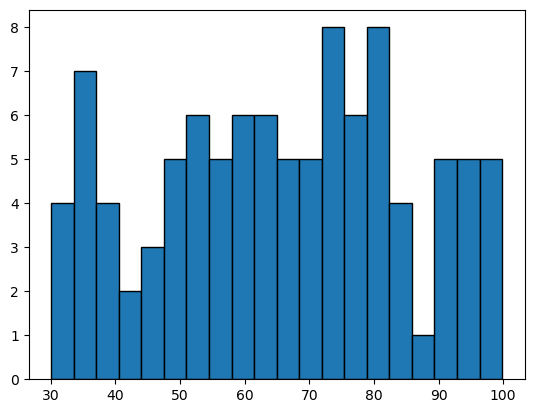

Sample does not look normally distributed


In [4]:
plt.hist(population['tempreture test'], bins=20, edgecolor='k')

plt.show()

# Sample data (replace with your dataset)
data = population['tempreture test']

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(data)

# Check the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("Sample looks normally distributed")
else:
    print("Sample does not look normally distributed")


As we can see visually and from Shapiro-Wilk test our dataset does not meet the assumption of normality but we still use it for our porpuse however it's best to use dataset that meet the assumation of normality when conducting T test for small samples.

# Constructing the Sampling Distribution Using Bootstrap Technique

In [5]:
mu = population['tempreture test'].mean()
estimate_list = []

for i in range(1000):
    estimate_list.append(population['tempreture test'].sample(n=30, replace=True).mean())

estimate_df = pd.DataFrame(data={'estimate': estimate_list})


In [6]:
sampling_distribution = estimate_df['estimate'].mean()
sampling_distribution

65.78760670252666

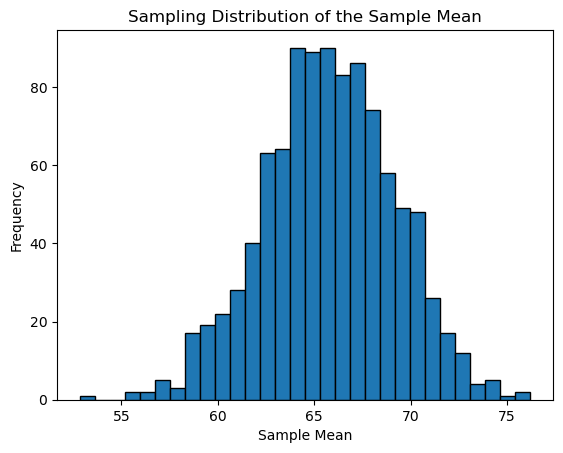

In [7]:
plt.hist(estimate_list, bins=30, edgecolor='k')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Sample Mean')
plt.show()



### Taking a random sample of size $n$ with replacement

In [28]:
sample1 = population.sample(n=4, replace=True)
sample1

,tempreture test,strudy test,accepted or rejected
86,42.075455,78.844786,0
17,67.946855,46.678574,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0


Taking mean of the sample, we call it estimate1

In [29]:
estimate1 = sample1['tempreture test'].mean()
estimate1

47.73824906749999

In [30]:
sample1['tempreture test'].std()

14.010662274462046

In [31]:
estimated_standard_error_z = np.std(sample1['tempreture test']) / np.sqrt(sample1['tempreture test'].shape[0])
estimated_standard_error_z


6.066794726764198

In [32]:
s = np.std(sample1['tempreture test'], ddof=1)
estimated_standard_error_t = s / np.sqrt(sample1['tempreture test'].shape[0])
estimated_standard_error_t

7.005331137231023

### Calculating confidence interval using $T$ and $Z$ for our sample of size $n$ using 95% confidence level

If we have small samples, we use the t-distribution to construct the confidence interval.

In [33]:
df = 3
confidence_level = 0.95
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
MOE = t_critical * (s / np.sqrt(sample1['tempreture test'].shape[0]))

lower_bound = estimate1 - MOE
upper_bound = estimate1 + MOE
confidence_interval_t = (lower_bound, upper_bound)
confidence_interval_t

(25.44415887252632, 70.03233926247367)

If we have large samples, we will use the Z-distribution to construct the confidence interval.

In [34]:
confidence_interval_z = stats.norm.interval(confidence=0.95, loc=estimate1, scale=estimated_standard_error_z)
confidence_interval_z

(35.84754990144465, 59.628948233555334)

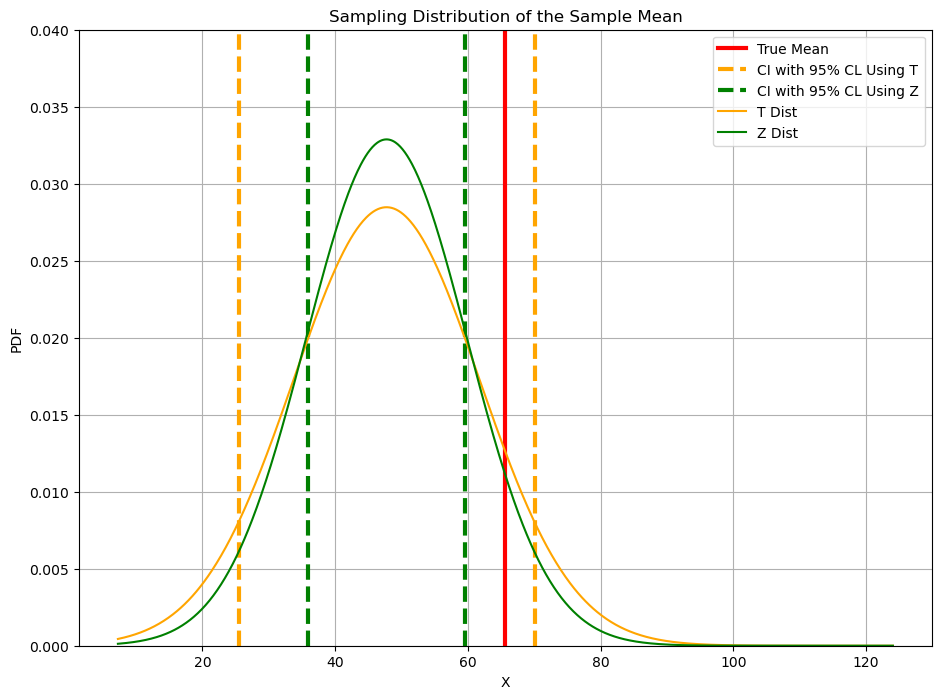

In [36]:
plt.figure(figsize=(11, 8))
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Sampling Distribution of the Sample Mean')
plt.ylim(0, 0.04)

sigma = population['tempreture test'].std()

plt.axvline(population['tempreture test'].mean(), color='red', label='True Mean', linewidth=3)
# 95 CI
plt.axvline(confidence_interval_t[0], color='orange', label='CI with 95% CL Using T', linestyle='--', linewidth=3)
plt.axvline(confidence_interval_t[1], color='orange', linestyle='--', linewidth=3)

plt.axvline(confidence_interval_z[0], color='green', label='CI with 95% CL Using Z', linestyle='--', linewidth=3)
plt.axvline(confidence_interval_z[1], color='green', linestyle='--', linewidth=3)



x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
pdf_sd = stats.norm.pdf(x, sampling_distribution, estimate_df['estimate'].std())

pdf_z = stats.norm.pdf(x, estimate1, np.std(sample1['tempreture test']))
pdf_t = stats.norm.pdf(x, estimate1, s)
pdf_t2 = stats.norm.pdf(x, estimate1, s)
pdf_t3 = stats.norm.pdf(x, estimate1, s)
pdf_t4 = stats.norm.pdf(x, estimate1, s)
plt.plot(x, pdf_t, label='T Dist', color='orange')
plt.plot(x, pdf_z, label='Z Dist', color='green')

plt.grid(True)
plt.legend()
plt.show()

#### As we can see from the graph above, the confidence interval with Z cannot capture the true mean, which is why we use T.

# Setting Null and Alternate Hypotheses

### $H_0: \mu = 65$ Average tempreture test is 65

### $H_1: \mu \neq \mu_0 \quad (\text{Two-Tailed Test})$ Average tempreture test is not 65


### Calculating Test Statistics $t = (\bar{x} - \mu) / (s / √n)$

In [37]:
# Perform a one-sample t-test
t_stat = (estimate1 - sampling_distribution) / estimated_standard_error_t
t_stat

-2.5765174095911454

### Using rejection region to test research hypotheses

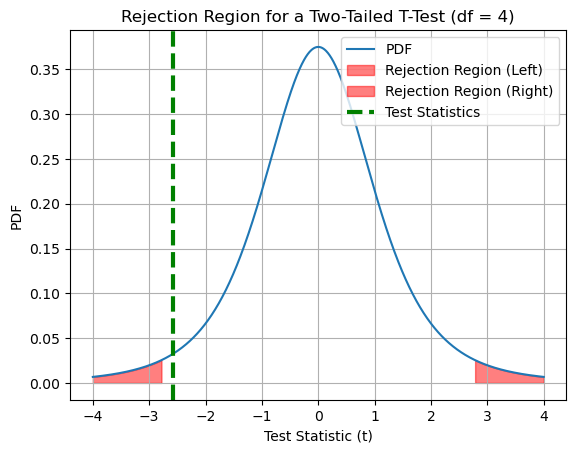

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define the degrees of freedom and significance level
df = 4
alpha = 0.05

# Define the test statistic (t in this case)
t_values = np.linspace(-4, 4, 1000)  # Range of t values

# Calculate the PDF of the t-distribution
pdf = t.pdf(t_values, df)

# Create the plot
plt.plot(t_values, pdf, label='PDF')

# Calculate critical values for a two-tailed test
critical_left = t.ppf(alpha / 2, df)
critical_right = t.ppf(1 - alpha / 2, df)

# Shade the rejection regions
plt.fill_between(t_values, pdf, where=(t_values < critical_left), color='red', alpha=0.5, label='Rejection Region (Left)')
plt.fill_between(t_values, pdf, where=(t_values > critical_right), color='red', alpha=0.5, label='Rejection Region (Right)')

plt.axvline(t_stat, color='green', label='Test Statistics', linestyle='--', linewidth=3)

# Add labels and titles
plt.xlabel('Test Statistic (t)')
plt.ylabel('PDF')
plt.title(f'Rejection Region for a Two-Tailed T-Test (df = {df})')
plt.legend()

# Display the graph
plt.grid(True)
plt.show()

### Using P value to test research hypotheses

In [42]:
# Define your test statistics (t-value), degrees of freedom (df), and significance level (alpha)
t_value = t_stat
df = 3

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df))

# Define the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print(f"The sample mean is significantly different from the population mean (p-value = {p_value}).")
else:
    print(f"The sample mean is not significantly different from the population mean (p -value = {p_value}).")

The sample mean is not significantly different from the population mean (p -value = 0.08202736477021921).
